# Project: Investigate a Dataset - Medical Appointment No Shows

<a id='intro'></a>
## Introduction

### Dataset Description 
What if the appointment you didn't show for was crucial for your health?...<br>
What did you miss?...<br>
The dataset contains information about medical appointments in Brazil, including patient ID, appointment ID, gender, age, appointment date, scheduled appointment date, neighborhood, SMS received, and no-show status. The dataset was collected from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments).<br>
Primarily, this analysis will figure out why would any person miss a medical appointment.<br>
<table>
    <thead>
        <tr>
            <th>Column</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>PatientId</td>
            <td>Unique identifier for each patient</td>
        </tr>
        <tr>
            <td>AppointmentID</td>
            <td>Unique identifier for each appointment</td>
        </tr>
        <tr>
            <td>Gender</td>
            <td>Male or Female</td>
        </tr>
        <tr>
            <td>ScheduledDay</td>
            <td>The day of the actual appointment, when they have to visit the doctor.</td>
        </tr>
        <tr>
            <td>AppointmentDay</td>
            <td>The day someone called or registered the appointment, this is before appointment of course.</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>How old is the patient.</td>
        </tr>
        <tr>
            <td>Neighborhood</td>
            <td>Where the appointment takes place.</td>
        </tr>
        <tr>
            <td>Scholarship</td>
            <td>True if the patient was enrolled in Brasilian welfare program called Scholarship, False otherwise.</td>
        </tr>
        <tr>
            <td>Hypertension</td>
            <td>True if the patient has hypertension, False otherwise.</td>
        <tr>
        <tr>
            <td>Diabetes</td>
            <td>True if the patient has diabetes, False otherwise.</td>
        </tr>
        <tr>
            <td>Alcoholism</td>
            <td>True if the patient is an alcoholic, False otherwise.</td>
        </tr>
        <tr>
            <td>Handcap</td>
            <td>True if the patient has a handcap, False otherwise.</td>
        </tr>
        <tr>
            <td>SMS_received</td>
            <td>1 or more messages sent to the patient.</td>
        </tr>
        <tr>
            <td>No-show</td>
            <td>True if the patient did not show up to their appointment, False otherwise.</td>
        </tr>
</table>

### Question(s) for Analysis

- What is the relationship between the patient's age, gender, and no-show status?
- How does the number of SMS received affect the no-show status?
- What is the distribution of no-shows across different neighborhoods?

In [2]:
import numpy as np 
import pandas as pd

<a id='wrangling'></a>
## Data Wrangling

In [3]:
# Read the csv file and make a DataFrame
df = pd.read_csv('./noshowappointments-kagglev2-may-2016.csv')

# Display the first few rows of the dataset

df.head()

# Shape of the DataFrame

df.shape

# Inspect the datatypes and more with .info() function

df.info()

''' Fortunately, there is no missing values in the dataset as will appear from the returned data from .info() function'''

# Check for missing values (Further assurance)

df.isnull().sum()

# Get primary measures by .describe() function

df.describe()

# Check for unique values 

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning

First step of cleaning will be the removal of patientID and appointmentID from the DataFrame since they are not useful
in the analysis process

In [4]:
# Drop the 'PatientId' and 'AppointmentID' columns as they don't provide any useful information

df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# Get a few lines from the DataFrame to check the drop operation

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now, we want to change the datatype of scheduledDay and appointmentDay to datetime

In [5]:
# Convert the datatype to datetime

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Display the first few rows of the DataFrame to check the conversion

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Next, let's convert the 'No-show' column to boolean. True means the patient did not show up, False means the patient did show up.

In [6]:
# Convert the datatype to boolean

df['No-show'] = df['No-show'].apply(lambda x: True if x == 'Yes' else False)

# Display the first few rows of the DataFrame to check the conversion

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,False
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,False
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,False
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,False
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,False


In [7]:
# Check the datatypes again

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](2), int64(7), object(2)
memory usage: 9.

Here I want to rename the hipertension column into hypertension

In [8]:
# Renaming the column name

df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

In [9]:
# Check the conversion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hypertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](2), int64(7), object(2)
memory usage: 9.

Currently, let's convert the 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism','Handcap'<br>
and 'SMS_received' columns to boolean. True means the patient has the condition, False means the patient does not have the condition.




In [10]:
# Convert the datatypes to boolean

df['Scholarship'] = df['Scholarship'].apply(lambda x: True if x == 1 else False)
df['Hypertension'] = df['Hypertension'].apply(lambda x: True if x == 1 else False)
df['Diabetes'] = df['Diabetes'].apply(lambda x: True if x == 1 else False)
df['Alcoholism'] = df['Alcoholism'].apply(lambda x: True if x == 1 else False)
df['Handcap'] = df['Handcap'].apply(lambda x: True if x == 1 else False)
df['SMS_received'] = df['SMS_received'].apply(lambda x: True if x > 0 else False)

# Display the first few rows of the DataFrame to check the conversion

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,False
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,False
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,False
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,False


Now, We have to convert the names of columns to lower case

In [11]:
# Convert column names to lower case

df.columns = df.columns.str.lower()

# Display the DataFrame columns to check the conversion

df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

Lastly, I will optimize the datatype of some columns in order to optimize the usage of memory allocation

In [12]:
# Convert the datatypes to the most memory-efficient types

df['age'] = df['age'].astype('int8')

# Check the new datatype and memory allocation

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int8               
 4   neighbourhood   110527 non-null  object             
 5   scholarship     110527 non-null  bool               
 6   hypertension    110527 non-null  bool               
 7   diabetes        110527 non-null  bool               
 8   alcoholism      110527 non-null  bool               
 9   handcap         110527 non-null  bool               
 10  sms_received    110527 non-null  bool               
 11  no-show         110527 non-null  bool               
dtypes: bool(7), datetime64[ns, UTC](2), int8(1), object(2)
memory usage: 4.2

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,False
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,False
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,False
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,False
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,False


Now, the dataset is clean and optimized. We have converted the necessary columns to boolean, converted the datatype to the <br>
most memory-efficient types, and renamed the column 'Hipertension' to 'Hypertension'. We have also dropped the <br> 'PatientId' and 'AppointmentID' columns.

Next, we will move on to the next step of data analysis, which is exploring the relationships between different <br> variables and answering the questions we posed earlier.


<a id='eda'></a>
## Exploratory Data Analysis

Now, we will analyze the data to answer the questions we posed earlier.

### Research Question 1

First, we want to see the percentage of the no-shows

In [13]:
# Calculate the percentage of no-shows

no_shows_percentage = (df['no-show'].sum() / df.shape[0]) * 100
no_shows_percentage

np.float64(20.193255946510806)

The dataset contains approximately 20.2% no-shows.<br>
This means that approximately 20.2% of the patients did not show up to their appointments, which is actually a small percentage, isn't it? :)

Let's make a chart to graphically figure out the percentage of no-show status in the dataset

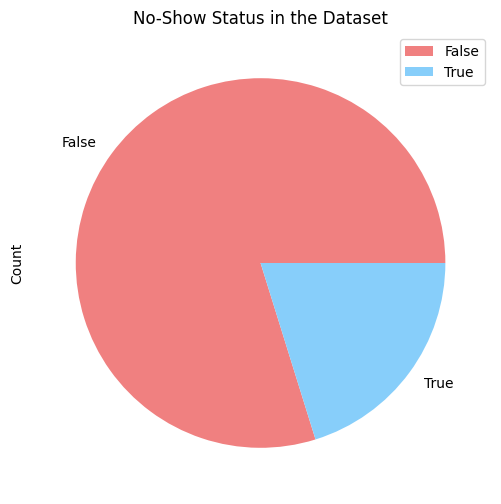

In [14]:
# Plot a chart for no-show status in the dataset (Pie chart)

df['no-show'].value_counts().plot(
    kind='pie', 
    figsize=(8, 6), 
    title='No-Show Status in the Dataset',
    xlabel='No-show status', 
    ylabel='Count', 
    legend=True,
    colors=['lightcoral', 'lightskyblue']);


The pie chart shows that approximately 79.8% of the patients did not show up to their appointments, and approximately 20.2% did show up.<br>

#### Reasoning Behind the Pie Chart
**Purpose**: It provides a visual summary of the proportion of patients who showed up for their<br> appointments versus those who did not.

**Insights**: This visualization helps quickly grasp how common missed appointments are compared to attended ones,<br> which can be essential for analyzing factors related to no-shows or studying appointment compliance.


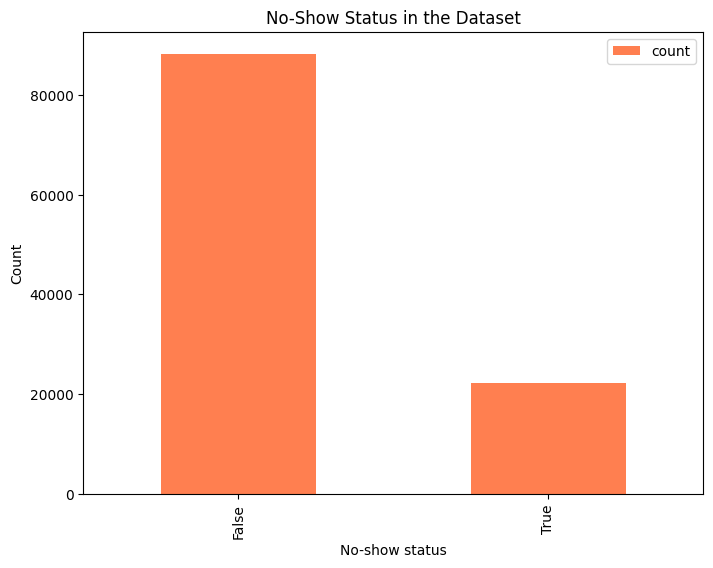

In [15]:
# Plot a chart for no-show status in the dataset

df['no-show'].value_counts().plot(
    kind='bar', 
    figsize=(8, 6), 
    title='No-Show Status in the Dataset',
    xlabel='No-show status', 
    ylabel='Count', 
    legend=True, 
    color='Coral');


Same result ofcourse but with different type of graphs :)

#### Reasoning Behind the Bar Chart
A bar chart is often more precise for comparing counts or identifying trends, as the length of the bars<br> makes it easy to compare exact numbers and proportions.<br>
You can easily see which status has a higher count and by how much.

Next, let's find out the relationship between the patient's age, gender, and no-show status.<br>
First with the age...

In [16]:
# Calculate the mean age of no-shows and shows

no_shows_age = df[df['no-show'] == True]['age'].mean()
shows_age = df[df['no-show'] == False]['age'].mean()

print(np.round(no_shows_age))
print(np.round(shows_age))

34.0
38.0


The mean age of no-shows is approximately 34, and the mean age of shows is approximately 38.<br> This indicates that the average age of patients who did not show up to their appointments is slightly<br> **younger** than the average age of patients who did show up.<br>

Now, let's figure out the relationship between gender and no-show status

In [17]:
# Calculate the percentage of no-shows for each gender

def calculation(argument):
    result = df[df['no-show'] == True][argument].value_counts(normalize=True) * 100
    return result

no_shows_gender = calculation('gender')

print(no_shows_gender)

gender
F    65.388234
M    34.611766
Name: proportion, dtype: float64



The percentage of no-shows for females is approximately 65.4%, and the percentage of no-shows for males is approximately 35%.<br> This indicates that females are more likely to not show up to their appointments than males.

Now, let's plot to find the relationship between age and no-show, and the relationship between gender and no-show.

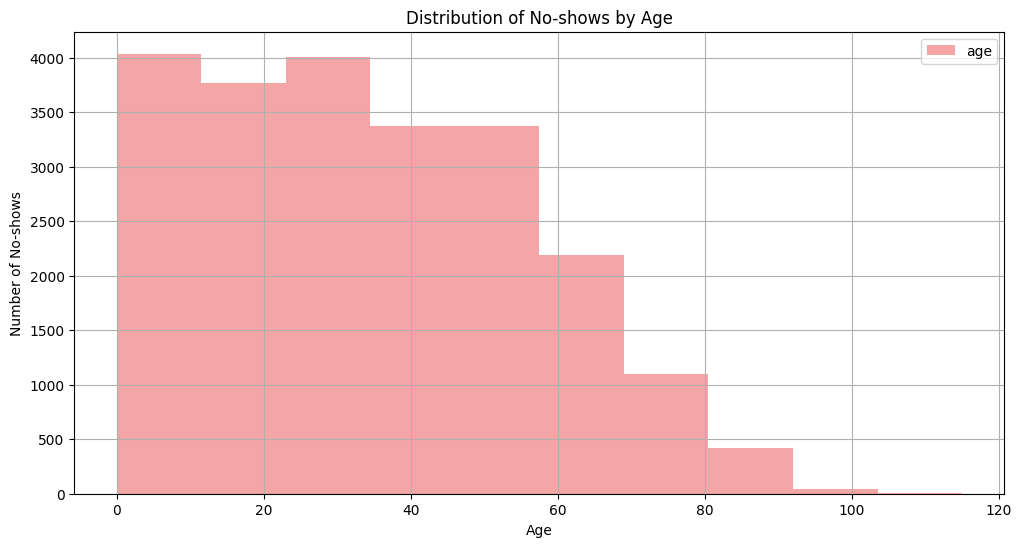

In [18]:
# Plot the distribution of no-shows by age

df[df['no-show'] == True]['age'].plot(
    kind='hist',
    figsize=(12, 6), 
    alpha=0.7, 
    grid=True,
    color='lightcoral', 
    title='Distribution of No-shows by Age', 
    xlabel='Age',
    ylabel='Number of No-shows',
    legend=True
);

#### Reasoning Behind the Histogram
The histogram shows how the ages of patients who missed their appointments are distributed.<br> This can reveal age groups that might have higher rates of no-shows.<br>
If certain age ranges, such as younger or older adults, show a higher frequency of no-shows,<br> this might inform targeted interventions or strategies to reduce no-show rates.

### Research Question 2

Now, we want to find how would the sms_received affect the no-show status?

In [19]:
# Calculate the percentage of no-shows for each SMS received status

no_shows_sms = calculation('sms_received')

print(no_shows_sms)

sms_received
False    56.162911
True     43.837089
Name: proportion, dtype: float64



The percentage of no-shows for patients who received no messages is approximately 56%, and the percentage of no-shows for patients who received at least one message is approximately 44%.<br> This indicates that receiving messages affects the no-show status.

Now, let's plot the distribution of no-shows by sms_received



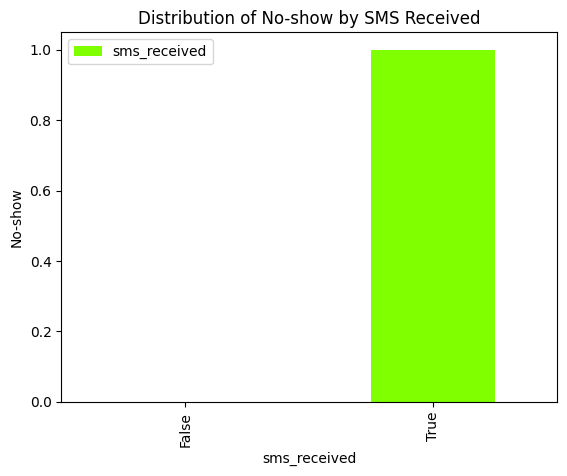

In [20]:
df[df['no-show'] == True].groupby('sms_received')['sms_received'].mean(numeric_only=True).plot(
    x='no-show', 
    y='sms_received', 
    kind='bar',
    title='Distribution of No-show by SMS Received', 
    ylabel='No-show', 
    legend=True,
    color='Chartreuse');

#### Reasoning
If patients who did not receive an SMS (0) have higher no-show rates than those who did (1), it suggests that SMS reminders may be effective in reducing missed appointments.

### Research Question 3

Now, we want to find the distribution of no-shows across different neighborhoods



In [21]:
# Calculate the percentage of no-shows for each neighborhood

no_shows_neighborhood = calculation('neighbourhood')

print(no_shows_neighborhood.sort_values(ascending=False).head())
print(no_shows_neighborhood.max())

neighbourhood
JARDIM CAMBURI    6.563914
MARIA ORTIZ       5.461714
ITARARÉ           4.135490
RESISTÊNCIA       4.059322
CENTRO            3.149783
Name: proportion, dtype: float64
6.56391415385994



The neighborhood with the highest percentage of no-shows is 'JARDIM CAMBURI ', with approximately 6.6% of no-shows.<br> The second highest percentage of no-shows is 'MARIA ORTIZL', with approximately 5.5% of no-shows.<br> The third highest percentage of no-shows is 'ITARARÉ', with approximately 4% of no-shows.

Now, let's plot the distribution of no-shows by neighborhood



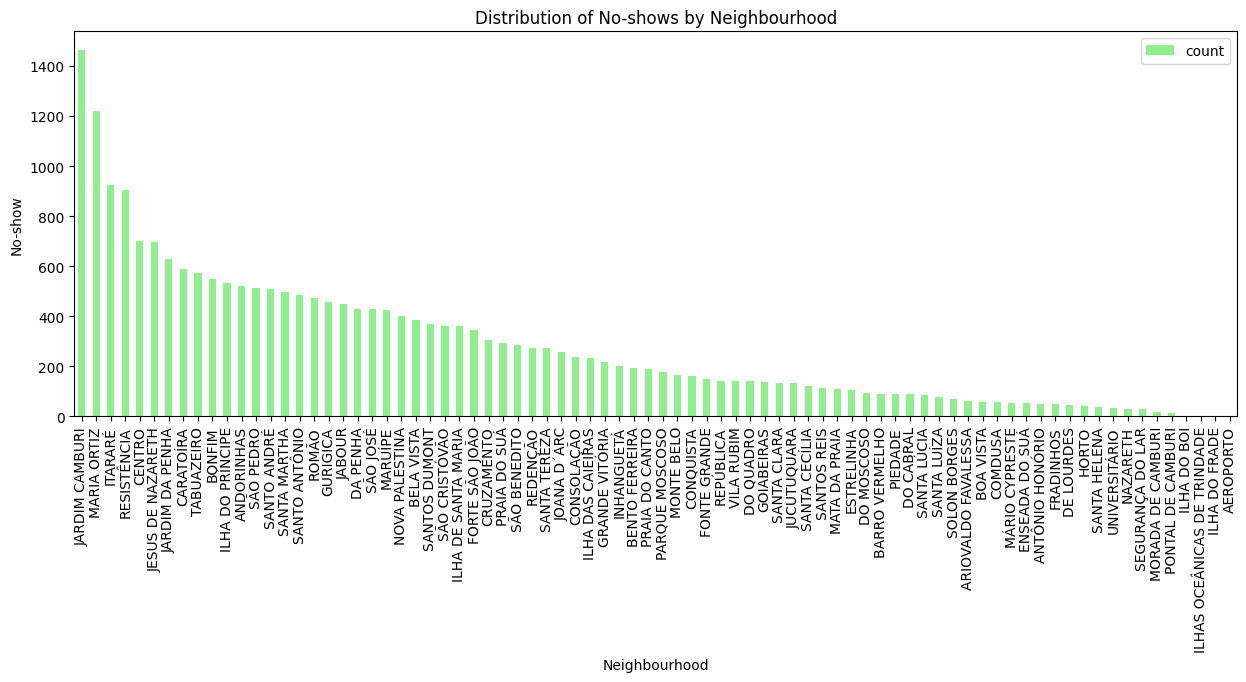

In [22]:

df[df['no-show'] == True]['neighbourhood'].value_counts().plot(
    kind='bar',
    figsize=(15, 5),
    legend=True, 
    xlabel='Neighbourhood',
    ylabel='No-show', 
    title='Distribution of No-shows by Neighbourhood',
    color='lightgreen');

#### Reasoning
High counts in certain neighborhoods might indicate factors influencing no-show rates,<br> such as accessibility, socio-economic conditions, or healthcare awareness.<br> This information could be used to target specific neighborhoods for improvement strategies.


<a id='conclusions'></a>
## Conclusions


1. The dataset contains approximately 20.2% no-shows.<br>
2. The average age of patients who did not show up to their appointments is slightly younger than the average age of patients who did show up.<br>
3. Females are more likely to not show up to their appointments than males.<br>
4. Receiving messages affects the no-show status.<br>
5. The neighborhood with the highest percentage of no-shows is 'JARDIM CAMBURI ', with approximately 6.6% of no-shows.<br>
6. The second highest percentage of no-shows is 'MARIA ORTIZL', with approximately 5.5% of no-shows.<br>
7. The third highest percentage of no-shows is 'ITARARÉ', with approximately 4% of no-shows.<br>
8. The dataset is clean and optimized for memory allocation, with most columns converted to boolean and the datatype of 'age' optimized to 'int8'.<br>
9. The dataset can be used to answer the questions posed earlier, and the relationships between different variables and no-show status can be visualized using plots.

#### Limitations
1. The dataset may not be representative of all patients, as it does not include information about other factors that could influence no-show status.<br>
2. The dataset may not include all possible demographic groups, as it does not include information about patients who were not enrolled in the study.<br>
3. The dataset may not include all possible reasons for no-show, as it does not include information about patients who were not enrolled in the study.<br>
4. The dataset may not include all possible neighborhoods, as it does not include information about patients who were not enrolled in the study.<br>


